# 
# Importing All necessary libraries

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import warnings
import tensorflow as tf
import string
import datetime
warnings.filterwarnings("ignore")
%matplotlib inline
from sklearn.preprocessing import LabelEncoder


# Starting the performance of EDA# 

In [41]:

data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [42]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
print(f"The Shape of the Dataframe is: {data.shape}") #Number of Samples, Number of Pixels(Features)
print(f"Number of Samples in the Dataset: {data.shape[0]}")

The Shape of the Dataframe is: (42000, 785)
Number of Samples in the Dataset: 42000


In [44]:
# Number of unique character in the Dataset
print(f"Number of unique characters present in the Dataset: {len(data.label.unique())}") 

Number of unique characters present in the Dataset: 10


In [45]:
data.label.nunique()

10

In [46]:
#Dropping redundant coloums like names and labels from the training frames and keeping only pixel values

x = data.drop(columns=['label'], axis=1)
y= data[['label']]

x.shape, y.shape


((42000, 784), (42000, 1))

In [47]:
x_nump = np.array(x)
# x_re_norm /= 255.0
x_re_norm = x_nump/255.0

x_re_norm

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [48]:
x_re_norm.shape

(42000, 784)

In [49]:
import keras

In [50]:
y_cat = keras.utils.to_categorical(y, num_classes=10)


In [51]:
#split data into training and testing sets using the train_test_split
X_train, X_val, y_train, y_val = train_test_split(x_re_norm, y_cat, test_size = 0.2, random_state = 42)

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((33600, 784), (8400, 784), (33600, 10), (8400, 10))

In [52]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

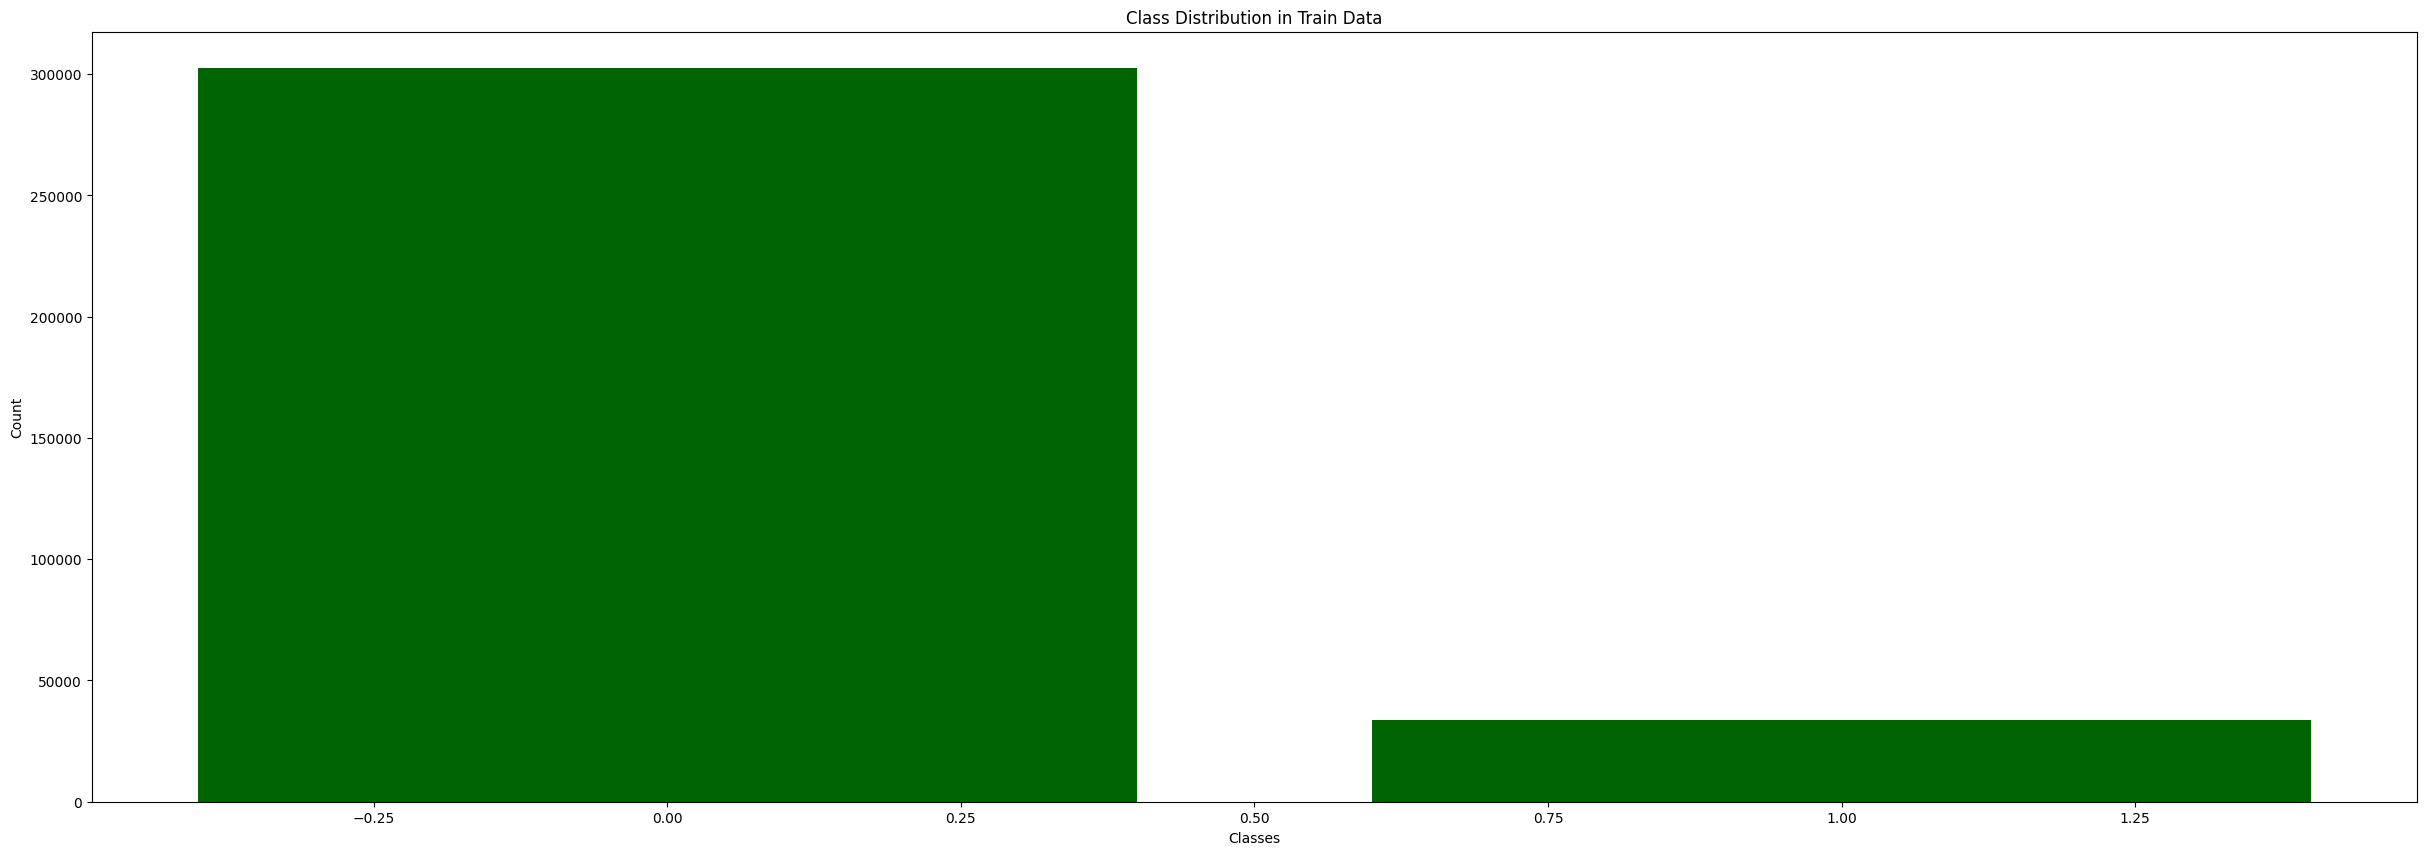

In [53]:
#checking the distribution of Train dataset
unique_labels_train, counts_train = np.unique(y_train, return_counts=True)
plt.figure(figsize=(30, 10))
plt.bar(unique_labels_train, counts_train, color='#006400')
plt.title('Class Distribution in Train Data')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.show()




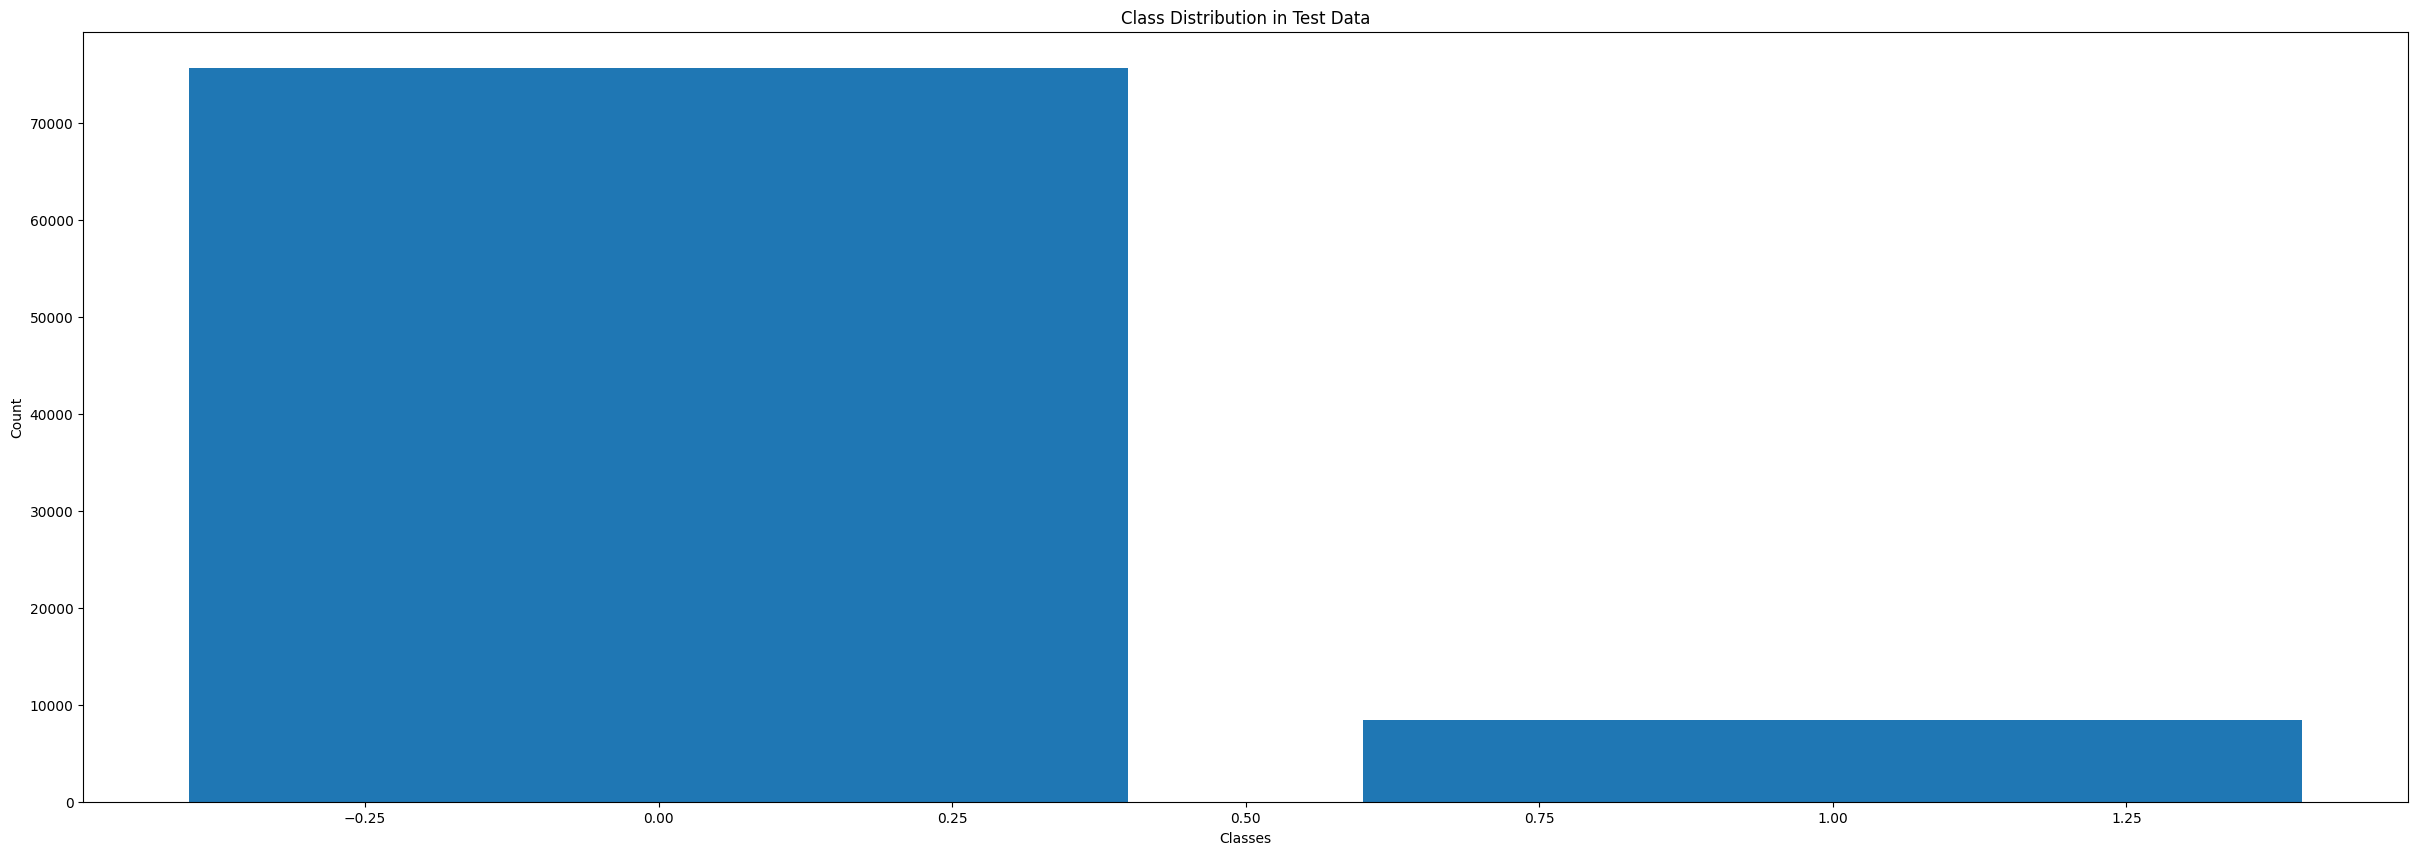

In [54]:
#checking the distribution of Test dataset
unique_labels_train, counts_train = np.unique(y_val, return_counts=True)
plt.figure(figsize=(30, 10))
plt.bar(unique_labels_train, counts_train)
plt.title('Class Distribution in Test Data')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.show()

In [55]:
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

model = tf.keras.Sequential([
    layers.Input(shape=(784,)),
    layers.Dense(units=256, activation='relu', name='dense_layer1'),
    layers.Dense(units=128, activation='relu', name='dense_layer2'),
    layers.Dense(units=64, activation='relu', name='dense_layer3'),
    layers.Dense(units=10,activation='softmax', name='output_layer')
], name='Model')

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['categorical_accuracy']
)

model.summary()


Model: "Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_layer1 (Dense)            │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_layer2 (Dense)            │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_layer3 (Dense)            │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 242,762 (948.29 KB)

 Trainable params: 242,762 (948.29 KB)

 Non-trainable params: 0 (0.00 B)

In [56]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

Epoch 1/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - categorical_accuracy: 0.8553 - loss: 0.4667 - val_categorical_accuracy: 0.9556 - val_loss: 0.1438
Epoch 2/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - categorical_accuracy: 0.9663 - loss: 0.1051 - val_categorical_accuracy: 0.9624 - val_loss: 0.1234
Epoch 3/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - categorical_accuracy: 0.9778 - loss: 0.0695 - val_categorical_accuracy: 0.9598 - val_loss: 0.1289
Epoch 4/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - categorical_accuracy: 0.9837 - loss: 0.0517 - val_categorical_accuracy: 0.9692 - val_loss: 0.1063
Epoch 5/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - categorical_accuracy: 0.9876 - loss: 0.0425 - val_categorical_accuracy: 0.9676 - val_loss: 0.1105
Epoch 6/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - categorical_accuracy: 0.9897 - loss: 0.0313 - val_categorical_accuracy: 0.9700 - val_loss: 0.1158
Epoch 7/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - categorical_accurac

# Evaluate the Model

In [59]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_val, y_val)
print('Test accuracy:', test_acc)

263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - categorical_accuracy: 0.9735 - loss: 0.1171
Test accuracy: 0.9729762077331543


# Visualize the Results

In [61]:
print(history.history.keys())


dict_keys(['categorical_accuracy', 'loss', 'val_categorical_accuracy', 'val_loss'])


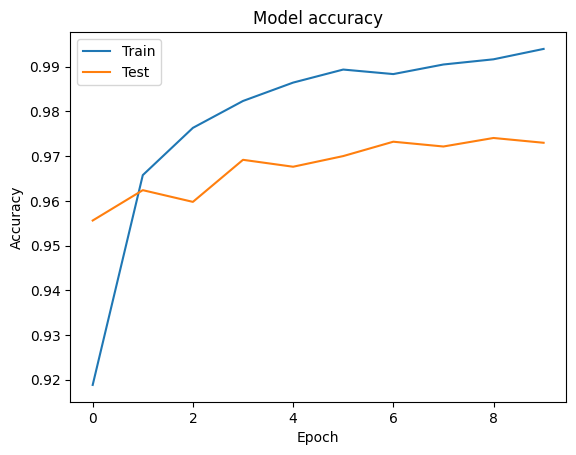

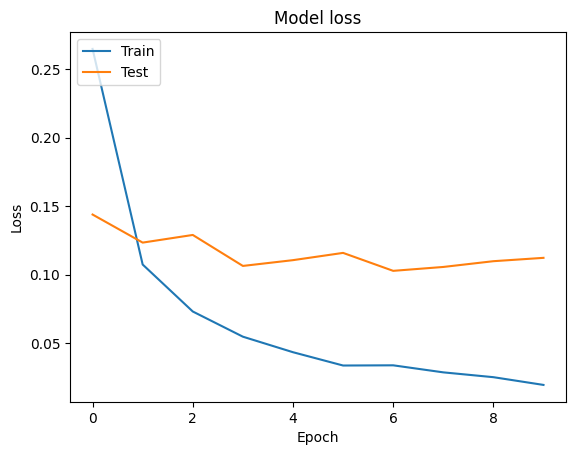

In [62]:
# Plot training & validation accuracy values
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Prediction

In [64]:
preds = model.predict(X_val)
preds

263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[5.89987394e-07, 3.44501444e-07, 1.94065763e-09, ...,
        1.09528436e-07, 9.99998868e-01, 6.23300611e-09],
       [1.58297625e-10, 9.99999344e-01, 2.90195284e-10, ...,
        8.97555594e-08, 4.33997002e-07, 7.18970772e-10],
       [1.03667979e-07, 1.23065214e-09, 2.21696395e-09, ...,
        4.94026892e-07, 2.02798401e-06, 9.99996841e-01],
       ...,
       [7.57497935e-19, 1.35274336e-09, 1.71436216e-12, ...,
        3.15107836e-12, 2.27290842e-11, 1.34061573e-11],
       [9.99999940e-01, 8.75982879e-17, 4.07228175e-11, ...,
        5.27376276e-12, 1.16352428e-10, 5.10532394e-10],
       [1.25104871e-09, 2.16254614e-09, 2.71981748e-09, ...,
        1.33170914e-07, 1.01322337e-08, 9.99999106e-01]], dtype=float32)

In [66]:
predictions= np.argmax(preds, axis=1)

In [67]:
predictions

array([8, 1, 9, ..., 3, 0, 9])

In [68]:
print(predictions[:100])


[8 1 9 9 8 6 2 2 7 1 6 3 1 2 7 4 3 3 6 4 9 5 2 6 0 0 0 8 6 3 6 6 1 9 8 6 7
 3 6 1 9 7 9 6 8 3 4 2 7 8 4 3 3 7 1 2 6 2 9 6 4 0 4 8 5 1 4 3 9 3 9 4 2 8
 1 6 3 9 0 3 1 7 6 7 6 1 9 5 3 6 9 3 7 6 6 5 2 9 3 5]


prediction [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


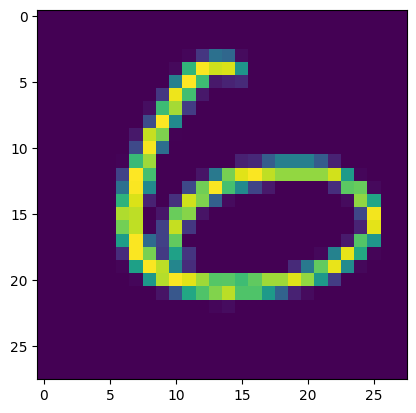

In [89]:


reshaped_image = X_val[10].reshape((28, 28))
plt.imshow(reshaped_image)
print("prediction",y_val[10])